In [ ]:
import pandas as pd
from google.colab import files
import io

print("Silakan upload file CSV")
uploaded = files.upload()

nama_file = next(iter(uploaded))

try:
    df = pd.read_csv(io.BytesIO(uploaded[nama_file]))
    print(f"\nBerhasil membaca file: {nama_file}")
    display(df.head())
    df.info()

except Exception as e:
    print(f"Terjadi kesalahan saat membaca file: {e}")

Silakan upload file CSV Anda:


Saving synthetic_disease_risk_dataset.csv to synthetic_disease_risk_dataset.csv

Berhasil membaca file: synthetic_disease_risk_dataset.csv

--- Sample Data (5 Baris Pertama) ---


,Patient_ID,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Glucose_Level,Family_History,Genetic_Risk_Score,Previous_Diagnosis,Disease_Risk
0,P100000,69,Female,27.8,Never,NaN,Low,92,117,297,156,Yes,0.52,NaN,No
1,P100001,32,Female,32.0,Never,Moderate,Moderate,149,77,279,163,Yes,0.50,NaN,Yes
2,P100002,89,Male,24.2,Former,High,High,124,82,189,139,Yes,0.37,Diagnosed,No
3,P100003,78,Male,23.8,Never,NaN,Moderate,118,81,159,169,No,0.55,NaN,No
4,P100004,38,Male,29.8,Never,Moderate,Moderate,164,63,213,97,Yes,0.59,Pre-disease,No



--- Informasi Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                4000 non-null   object 
 1   Age                       4000 non-null   int64  
 2   Gender                    4000 non-null   object 
 3   BMI                       4000 non-null   float64
 4   Smoking_Status            4000 non-null   object 
 5   Alcohol_Consumption       2361 non-null   object 
 6   Physical_Activity_Level   4000 non-null   object 
 7   Blood_Pressure_Systolic   4000 non-null   int64  
 8   Blood_Pressure_Diastolic  4000 non-null   int64  
 9   Cholesterol_Level         4000 non-null   int64  
 10  Glucose_Level             4000 non-null   int64  
 11  Family_History            4000 non-null   object 
 12  Genetic_Risk_Score        4000 non-null   float64
 13  Previous_Diagnosis        1973 non-n

# Preprocessing Data

In [ ]:
df_clean = df.copy()
initial_rows = df_clean.shape[0]

df_clean = df_clean.drop(columns=['Patient_ID'])

obj_cols = df_clean.select_dtypes(include=['object']).columns
for col in obj_cols:
    df_clean[col] = df_clean[col].str.strip()

smoking_map = {'Never': 0, 'Former': 1, 'Current': 2}
alcohol_map = {'None': 0, 'Moderate': 1, 'High': 2}
activity_map = {'Low': 0, 'Moderate': 1, 'High': 2}
diagnosis_map = {'None': 0, 'Pre-disease': 1, 'Diagnosed': 2}
binary_map = {'Yes': 1, 'No': 0}
gender_map = {'Male': 0, 'Female': 1}

df_clean['Smoking_Status'] = df_clean['Smoking_Status'].map(smoking_map)
df_clean['Alcohol_Consumption'] = df_clean['Alcohol_Consumption'].map(alcohol_map)
df_clean['Physical_Activity_Level'] = df_clean['Physical_Activity_Level'].map(activity_map)
df_clean['Previous_Diagnosis'] = df_clean['Previous_Diagnosis'].map(diagnosis_map)
df_clean['Family_History'] = df_clean['Family_History'].map(binary_map)
df_clean['Disease_Risk'] = df_clean['Disease_Risk'].map(binary_map)
df_clean['Gender'] = df_clean['Gender'].map(gender_map)

df_clean = df_clean.dropna()

final_rows = df_clean.shape[0]
removed_rows = initial_rows - final_rows

print(f"Jumlah baris awal: {initial_rows}")
print(f"Jumlah baris setelah cleaning: {final_rows}")
print(f"Jumlah baris yang dihilangkan: {removed_rows} ({(removed_rows/initial_rows)*100:.2f}%)")

display(df_clean.head())
df_clean.info()

Jumlah baris awal: 4000
Jumlah baris setelah cleaning: 1110
Jumlah baris yang dihilangkan: 2890 (72.25%)


,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Glucose_Level,Family_History,Genetic_Risk_Score,Previous_Diagnosis,Disease_Risk
2,89,0.0,24.2,1,2.0,2,124,82,189,139,1,0.37,2.0,0
4,38,0.0,29.8,0,1.0,1,164,63,213,97,1,0.59,1.0,0
8,70,0.0,30.0,0,2.0,1,116,114,293,198,0,0.43,2.0,0
12,19,0.0,32.9,0,1.0,1,108,116,193,135,1,0.71,1.0,0
13,81,0.0,22.3,1,2.0,2,106,94,292,194,0,0.65,1.0,0


<class 'pandas.core.frame.DataFrame'>
Index: 1110 entries, 2 to 3998
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1110 non-null   int64  
 1   Gender                    1110 non-null   float64
 2   BMI                       1110 non-null   float64
 3   Smoking_Status            1110 non-null   int64  
 4   Alcohol_Consumption       1110 non-null   float64
 5   Physical_Activity_Level   1110 non-null   int64  
 6   Blood_Pressure_Systolic   1110 non-null   int64  
 7   Blood_Pressure_Diastolic  1110 non-null   int64  
 8   Cholesterol_Level         1110 non-null   int64  
 9   Glucose_Level             1110 non-null   int64  
 10  Family_History            1110 non-null   int64  
 11  Genetic_Risk_Score        1110 non-null   float64
 12  Previous_Diagnosis        1110 non-null   float64
 13  Disease_Risk              1110 non-null   int64  
dtypes: float64(5)

# Exploratory Data Analysis

/tmp/ipython-input-2300014500.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disease_Risk', y='Cholesterol_Level', data=df_clean, palette='Set2')
/tmp/ipython-input-2300014500.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disease_Risk', y='Genetic_Risk_Score', data=df_clean, palette='Set2')


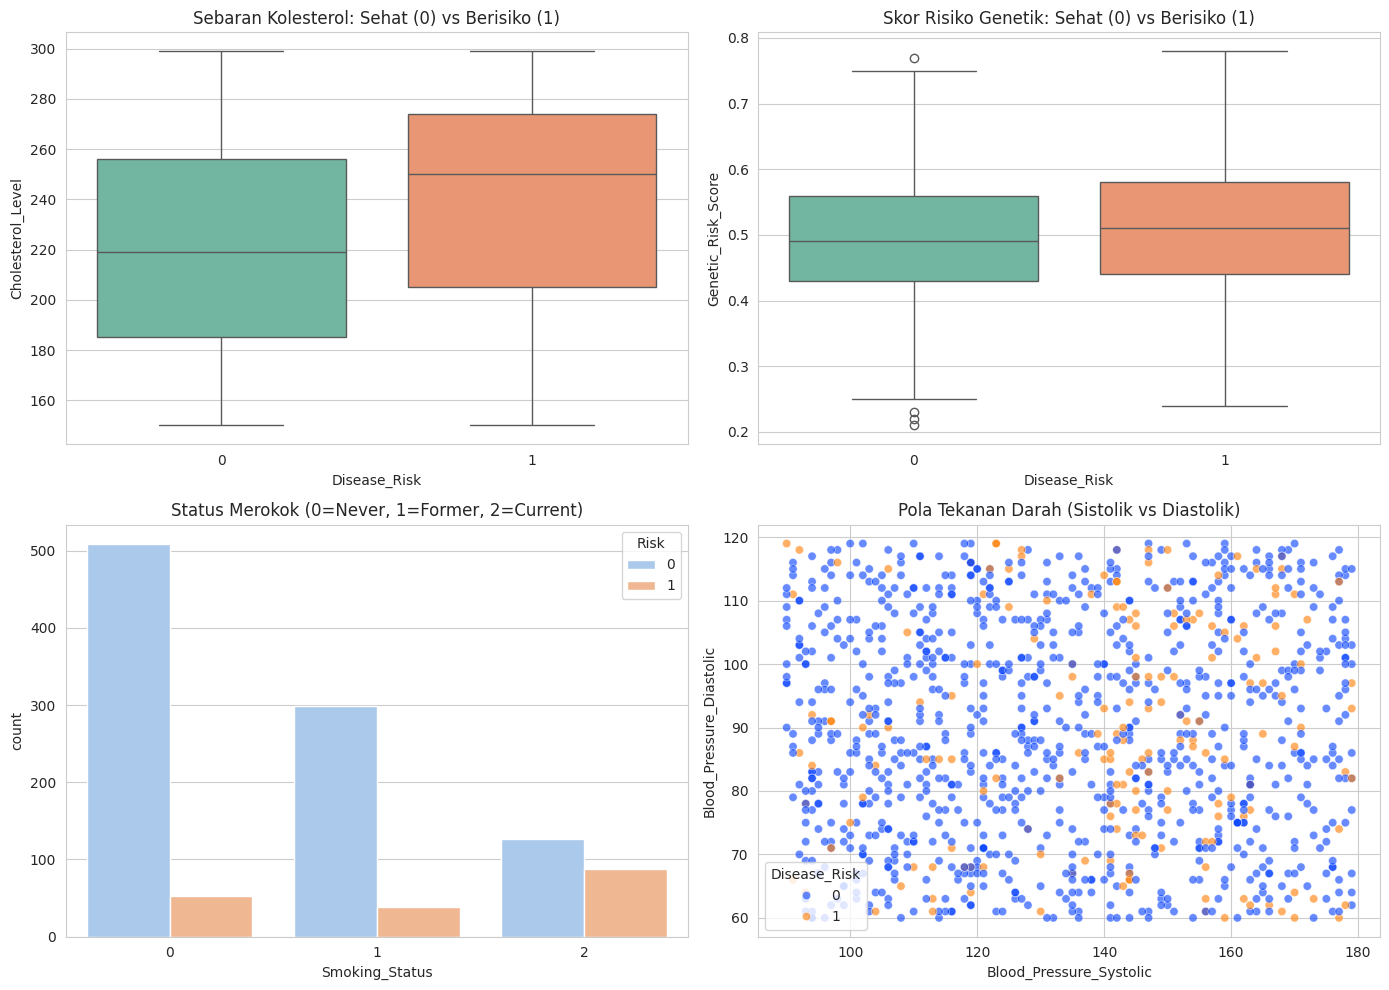

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Disease_Risk', y='Cholesterol_Level', data=df_clean, palette='Set2')
plt.title('Sebaran Kolesterol: Sehat (0) vs Berisiko (1)')

plt.subplot(2, 2, 2)
sns.boxplot(x='Disease_Risk', y='Genetic_Risk_Score', data=df_clean, palette='Set2')
plt.title('Skor Risiko Genetik: Sehat (0) vs Berisiko (1)')

plt.subplot(2, 2, 3)
sns.countplot(x='Smoking_Status', hue='Disease_Risk', data=df_clean, palette='pastel')
plt.title('Status Merokok (0=Never, 1=Former, 2=Current)')
plt.legend(title='Risk', loc='upper right')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Blood_Pressure_Systolic', y='Blood_Pressure_Diastolic',
                hue='Disease_Risk', data=df_clean, alpha=0.6, palette='bright')
plt.title('Pola Tekanan Darah (Sistolik vs Diastolik)')

plt.tight_layout()
plt.show()

# Regression Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_clean.drop(columns=['Disease_Risk'])
y = df_clean['Disease_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("--- Evaluasi Model Regresi Logistik ---")
print(f"Akurasi Model: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nLaporan Klasifikasi Lengkap:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix (Tabel Kebenaran):")

display(pd.DataFrame(confusion_matrix(y_test, y_pred),
                     columns=['Prediksi Sehat', 'Prediksi Sakit'],
                     index=['Aktual Sehat', 'Aktual Sakit']))

coef_df = pd.DataFrame({'Fitur': X.columns, 'Koefisien (Pengaruh)': log_reg.coef_[0]})
coef_df = coef_df.sort_values(by='Koefisien (Pengaruh)', ascending=False)

print("\n--- Faktor Paling Berpengaruh (Koefisien Regresi) ---")
display(coef_df)

--- Evaluasi Model Regresi Logistik ---
Akurasi Model: 89.19%

Laporan Klasifikasi Lengkap:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       190
           1       0.67      0.50      0.57        32

    accuracy                           0.89       222
   macro avg       0.79      0.73      0.75       222
weighted avg       0.88      0.89      0.89       222


Confusion Matrix (Tabel Kebenaran):


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Prediksi Sehat,Prediksi Sakit
Aktual Sehat,182,8
Aktual Sakit,16,16



--- Faktor Paling Berpengaruh (Koefisien Regresi) ---


,Fitur,Koefisien (Pengaruh)
3,Smoking_Status,1.654263
4,Alcohol_Consumption,1.436619
11,Genetic_Risk_Score,1.338731
10,Family_History,0.908690
2,BMI,0.316105
1,Gender,0.090097
6,Blood_Pressure_Systolic,0.024007
9,Glucose_Level,0.019939
8,Cholesterol_Level,0.019266
0,Age,0.005576


# Feature Engineering

Akurasi Model: 83.78%
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       190
           1       0.46      0.81      0.59        32

    accuracy                           0.84       222
   macro avg       0.71      0.83      0.74       222
weighted avg       0.89      0.84      0.85       222



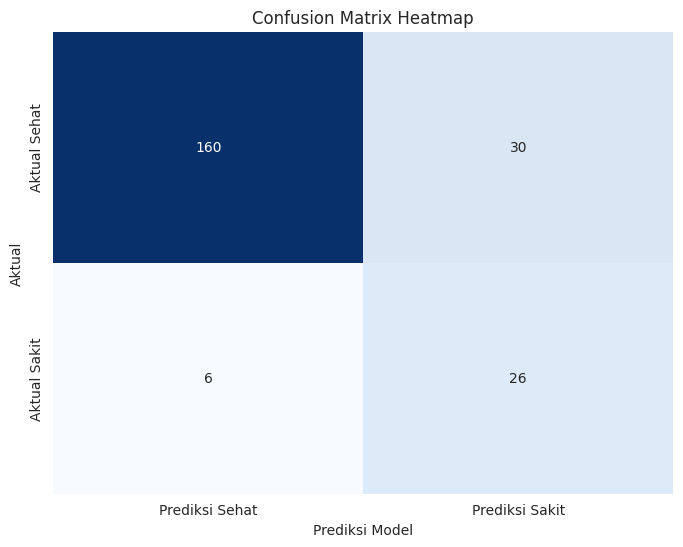

In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

df_fe = df_clean.copy()

df_fe['Pulse_Pressure'] = df_fe['Blood_Pressure_Systolic'] - df_fe['Blood_Pressure_Diastolic']

df_fe['Lifestyle_Risk'] = ((df_fe['Smoking_Status'] == 2) |
                           (df_fe['Alcohol_Consumption'] == 2) |
                           (df_fe['BMI'] > 30)).astype(int)

df_fe['Senior_Citizen'] = (df_fe['Age'] > 60).astype(int)


X_fe = df_fe.drop(columns=['Disease_Risk'])
y_fe = df_fe['Disease_Risk']

scaler = StandardScaler()
X_fe_scaled = scaler.fit_transform(X_fe)

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe_scaled, y_fe, test_size=0.2, random_state=42)

log_reg_fe = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg_fe.fit(X_train_fe, y_train_fe)

y_pred_fe = log_reg_fe.predict(X_test_fe)

print(f"Akurasi Model: {accuracy_score(y_test_fe, y_pred_fe)*100:.2f}%")

print(classification_report(y_test_fe, y_pred_fe))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_fe, y_pred_fe)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Prediksi Sehat', 'Prediksi Sakit'],
            yticklabels=['Aktual Sehat', 'Aktual Sakit'])

plt.xlabel('Prediksi Model')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Heatmap')
plt.show()